MSDS 7331 Project 1
Lab One: Visualization and Data Preprocessing
James (Jim) Brittain and Joseph Cook
FAA WILDLIFE (BIRD) STRIKE DATA 1990-2015

# Business Understanding (10 points total)
Describe the purpose of the data set you selected (i.e., why was this data collected in the ﬁrst place?). Describe how you would deﬁne and measure the outcomes from the dataset. That is, why is this data important and how do you know if you have mined useful knowledge from the dataset? How would you measure the effectiveness of a good prediction algorithm? Be speciﬁc.
Data Understanding (80 points total)
[10 points] Describe the meaning and type of data (scale, values, etc.) for each attribute in the data ﬁle.
[15 points] Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justiﬁcations for your methods.
[10 points] Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.
[15 points] Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.
[15 points] Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.
[10 points] Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classiﬁcation).
[5 points] Are there other features that could be added to the data or created from existing features? Which ones?
Exceptional Work (10 points total)
You have free reign to provide additional analyses.
One idea: implement dimensionality reduction, then visualize and interpret the results.
Business Understanding
This data appears to be the data behind the searchable database for Airplane strikes of wildlife found at: https://wildlife.faa.gov/.
The dataset was found on Kaggle: Aircraft Wildlife Strikes 1990-2015 https://www.kaggle.com/faa/wildlife-strikes The dataset provides various data related to each wildlife strike by an airplane for the years 1990-2015. There is very detailed information on the species of animal being struck, the make and model of the aircraft, and indicators of strike location on the aircraft and damage indicators. When searching the internet for more information on this dataset such as data labels/values for categorical numeric values that must represnent more detailed values; we found that the FAA publishes a detailed report using this data in conjuction with additional data in some cases. The latest version of this report can be found here: https://www.faa.gov/airports/airport_safety/wildlife/media/Wildlife-Strike-Report-1990-2015.pdf
The main purpose of this data is to track incidents of wildlife strikes by airplanes with the intention of trying to make changes that may lower the incidence rate. Some of the methods used to reduce birds in the vacinity of airports, to lower the bird strike rate; include: using preditor birds to scare away other species, air cannons (for sound), and not allowing land fills within close proximity of airports.
Although there are a large number of bird strikes in this data from 1990-2015 n=168,149; these incidents rarely result in injury (incidents n=204 resulting in n=265 injuries) or death (incidents n=11 resulting in n=25 deaths). A search for total flights in the US per year found this report: http://garfors.com/2014/06/100000-flights-day.html/. The report shows that "there are 37.4 million flights scheduled in 2014" compared to 13,455 bird strikes in that same year.
Describe the meaning and type of data
Reviewing the Kaggle page that presents this data and even searching the FAA site did not turn up a data dictionary which makes some of the variables less useful for data analysis. Another interesting point was that the FAA website does not appear to have this data available there.
This data includes bird strikes, terestrial animal strikes, and bats. For the purpose of this analysis the dataset will be subset to just the bird strikes which represents the largest portion of the incidents.
Some variables have been dropped due to not being needed for the chosen analysis.
Data Dictionary
VARIABLE DATA TYPE
Incident_Year             INT 
Incident_Month            INT 
Operator_ID               CAT           Aircraft Company/Affiliation Code
Operator                 String         Aircraft Company/Affiliation Description/Name
Aircraft                  CAT
Aircraft_Type             CAT           Believed to be Commercial/Private 
                                        (A, B / 23% Missing - Includes value=J n=5)
Aircraft_Mass             INT           5 categories (seached for values but only found a report with 4 categories)
                                        (1 - 5 / 26% Missing)
Engines                   INT           Number of engines on the aircraft
                                        (1 - 4 / 26% Missing)
Engine_Type               CAT           Type of Engine on Aircraft
                                        (A-Reciprocating, B-Turbojet, C-Turboprop, D-Turbofan,
                                         E-None (glider), F-Turboshaft (helicopter),
                                         Y-Other
                                          / 26% Missing)
Airport_ID                CAT           Airport Code
Airport                  String         Airport Description/Name
State                     CAT           State of Strike
FAA_Region                CAT           FAA Region of Strike
Warning_Issued           object         
Flight_Phase             object
Height                 CONTINUOUS       Height Above Ground
                                        (0 - 31,300 / 40% Missing)
Speed                  CONTINUOUS       Airspeed (nautical miles/hour [knots])
                                        (0 - 500 / 58% Missing - Includes 1 outlier of 2500)
Species_ID                CAT           Species Struck ID
Species_Name             String         Species Struck Description/Name
* species_group           CAT           * Created Var * Species Grouped to 20 Categories
                                        (48% UNKNOWN)
Species_Quantity          CAT           Number of Species Struck
                                        (1, 2-10, 11-100, Over 100
                                         / 2% Missing)
Flight_Impact             CAT           Impact of Flight from Strike
                                        (ABORTED TAKEOFF, ENGINE SHUTDOWN, NONE, OTHER, PRECAUTIONARY LANDING 
                                         / 42% Missing) 
Fatalities                INT           Number of Fatalities Strike Incident
                                        (0 - 8 / 99.7% Missing)
Injuries                  INT           Number of Fatalities Strike Incident
                                        (1 - 7 / 99.9% Missing)
Aircraft_Damage           INT BINARY    Indicator of Damage to the Aircraft
                                        (0-No Damage - 1-Damage Sustained)
Engine_Ingested           INT BINARY
INDICATORS for strike and damage (2 variables each)
Radome (Strike & Damage)  INT BINARY
Windshield                INT BINARY
Nose                      INT BINARY
Engine[1-4]               INT BINARY
Propeller                 INT BINARY
Wing_or_Rotor             INT BINARY
Fuselage                  INT BINARY
Landing_Gear              INT BINARY
Tail                      INT BINARY
Lights                    INT BINARY
Other                     INT BINARY
For all of the Strike / Damage variable pairs there are always a small number of records where there is no strike indicated but Damage is indicated.

In [37]:
import pandas as pd
import numpy as np

raw = pd.read_csv("C:/users/runni/Documents/MASTERS/Data Mining/wildlife-strikes/database.csv")
#read in file
df = raw
df.columns = [c.replace(' ', '_') for c in raw.columns]

df.head()

C:\Users\runni\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (9,12,15,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Record_ID,Incident_Year,Incident_Month,Incident_Day,Operator_ID,Operator,Aircraft,Aircraft_Type,Aircraft_Make,Aircraft_Model,...,Fuselage_Strike,Fuselage_Damage,Landing_Gear_Strike,Landing_Gear_Damage,Tail_Strike,Tail_Damage,Lights_Strike,Lights_Damage,Other_Strike,Other_Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


In [39]:
print (df.dtypes)
print (df.info())

Record_ID                 int64
Incident_Year             int64
Incident_Month            int64
Incident_Day              int64
Operator_ID              object
Operator                 object
Aircraft                 object
Aircraft_Type            object
Aircraft_Make            object
Aircraft_Model           object
Aircraft_Mass           float64
Engine_Make             float64
Engine_Model             object
Engines                 float64
Engine_Type              object
Engine1_Position         object
Engine2_Position        float64
Engine3_Position         object
Engine4_Position        float64
Airport_ID               object
Airport                  object
State                    object
FAA_Region               object
Warning_Issued           object
Flight_Phase             object
Visibility               object
Precipitation            object
Height                  float64
Speed                   float64
Distance                float64
                         ...   
Aircraft

In [40]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

## Data Manipulation
* Create "Modified" DF (BS-BIRD STRIKES)
* Dropped several variables deemed not necessary for current analysis
* Fix Value for Flight Impact (2 Categories coded: ENGINE SHUT DOWN & ENGINE SHUTDOWN)
* Identified the first position of the Species ID could be used to group Species (species_group)
* Dropped records for Terestrial Animals and Batts to focus analysis on Birds
* Recoded 1 species from k->K

In [50]:
# DROP VARS
df = df.drop('Record_ID', axis=1)
df = df.drop('Incident_Day', axis=1)
df = df.drop('Aircraft_Make', axis=1)
df = df.drop('Aircraft_Model', axis=1)
df = df.drop('Distance', axis=1)
df = df.drop('Engine_Make', axis=1)
df = df.drop('Engine_Model', axis=1)
df = df.drop('Engine1_Position', axis=1)
df = df.drop('Engine2_Position', axis=1)
df = df.drop('Engine3_Position', axis=1)
df = df.drop('Engine4_Position', axis=1)
df = df.drop('Visibility', axis=1)
df = df.drop('Precipitation', axis=1)

# LIST RESULTING VARS WITH DATA TYPES
print (df.dtypes)

# SIMPLE STATISTICS
print (df.describe())

Incident_Year             int64
Incident_Month            int64
Operator_ID              object
Operator                 object
Aircraft                 object
Aircraft_Type            object
Aircraft_Mass           float64
Engines                 float64
Engine_Type              object
Airport_ID               object
Airport                  object
State                    object
FAA_Region               object
Warning_Issued           object
Flight_Phase             object
Height                  float64
Speed                   float64
Species_ID               object
Species_Name             object
Species_Quantity         object
Flight_Impact            object
Fatalities              float64
Injuries                float64
Aircraft_Damage           int64
Radome_Strike             int64
Radome_Damage             int64
Windshield_Strike         int64
Windshield_Damage         int64
Nose_Strike               int64
Nose_Damage               int64
Engine1_Strike            int64
Engine1_

C:\Users\runni\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [58]:
# RECODES
df['Flight_Impact'] = df['Flight_Impact'].replace(to_replace='ENGINE SHUT DOWN', value='ENGINE SHUTDOWN')

# FREQ. TO CONFIRM
print(df['Flight_Impact'].value_counts(dropna=False))

# SUBSTRING SPECIES CODE
df['species_gp'] = df['Species_ID'].str[:1]
df['species_gp'] = df['species_gp'].replace(to_replace='k', value='K')

# DROP 1 & 2 (NON-BIRDS)
df = df[df['species_gp'].isin(['1','2']) == False]

# FREQ. TO CONFIRM
df['species_gp'].value_counts(dropna=False)

NONE                     86670
NaN                      71385
PRECAUTIONARY LANDING     6028
ABORTED TAKEOFF           2120
OTHER                     2071
ENGINE SHUTDOWN            431
Name: Flight_Impact, dtype: int64


U    80851
Y    18525
N    18219
Z    15651
O    12290
K    11104
J     4941
R     2544
I     1601
T      817
S      616
M      449
H      307
L      278
X      184
F      110
G       82
Q       59
E       42
P       24
W       11
Name: species_gp, dtype: int64

In [61]:
def set_group(row):
    if row["species_gp"] == "E":
        val = "LOONS"
    elif row["species_gp"] == "F":
        val = "GREBES"
    elif row["species_gp"] == "G":
        val = "ALBATROSS, SHEARWATERS"
    elif row["species_gp"] == "H":
        val = "TROPICBIRDS,PELICANS,CORMORANTS"
    elif row["species_gp"] == "I":
        val = "HERONS, EGRETS, BITTE"
    elif row["species_gp"] == "J":
        val = "DUCKS, GEESE, SWANS"
    elif row["species_gp"] == "K":
        val = "HAWKS, EAGLES, FALCONS"
    elif row["species_gp"] == "L":
        val = "GALLINACEOUS BIRDS"
    elif row["species_gp"] == "M":
        val = "CRANES, RAILS, GALLINULES"
    elif row["species_gp"] == "N":
        val = "SHOREBIRD"
    elif row["species_gp"] == "O":
        val = "PIGEONS, DOVES"
    elif row["species_gp"] == "P":
        val = "PARROTS"
    elif row["species_gp"] == "Q":
        val = "CUCKOOS, ROADRUNNERS"
    elif row["species_gp"] == "R":
        val = "OWLS"
    elif row["species_gp"] == "S":
        val = "NIGHTJARS"
    elif row["species_gp"] == "T":
        val = "SWIFTS, HUMMINGBIRDS"
    elif row["species_gp"] == "U":
        val = "UNKNOWN"
    elif row["species_gp"] == "W":
        val = "KINGFISHER"
    elif row["species_gp"] == "X":
        val = "WOODPECKERS, PICULETS"
    elif row["species_gp"] in["Y","Z"]:
        val = "PERCHING BIRDS"
    else:
        val = '---'
    return val

# RUN ABOVE ASSIGNMENT
df['species_group'] = df.apply(set_group, axis=1)

# FREQ. TO CONFIRM
print(df['species_group'].value_counts(dropna=False))

UNKNOWN                            80851
PERCHING BIRDS                     34176
SHOREBIRD                          18219
PIGEONS, DOVES                     12290
HAWKS, EAGLES, FALCONS             11104
DUCKS, GEESE, SWANS                 4941
OWLS                                2544
HERONS, EGRETS, BITTE               1601
SWIFTS, HUMMINGBIRDS                 817
NIGHTJARS                            616
CRANES, RAILS, GALLINULES            449
TROPICBIRDS,PELICANS,CORMORANTS      307
GALLINACEOUS BIRDS                   278
WOODPECKERS, PICULETS                184
GREBES                               110
ALBATROSS, SHEARWATERS                82
CUCKOOS, ROADRUNNERS                  59
LOONS                                 42
PARROTS                               24
KINGFISHER                            11
Name: species_group, dtype: int64


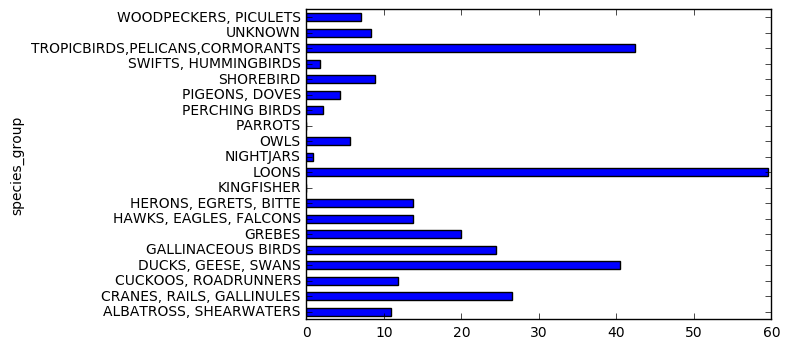

In [62]:
df_grouped = df.groupby(by=['species_group'])
damage_pct = (df_grouped.Aircraft_Damage.sum() / df_grouped.Aircraft_Damage.count()) * 100  

#print(damage_pct)

dmg_plt = damage_pct.plot(kind='barh')

##### Percent of Bird Strikes Resulting in Damage
The above chart shows that aircraft strikes by the "Loons' category have the highest percent of incidents that cause damage with ~60% of strikes resulting in damage of some sort. This is followed by the groups: 'TROPICBIRDS,PELICANS,CORMORANTS' and 'DUCKS, GEESE, SWANS'.

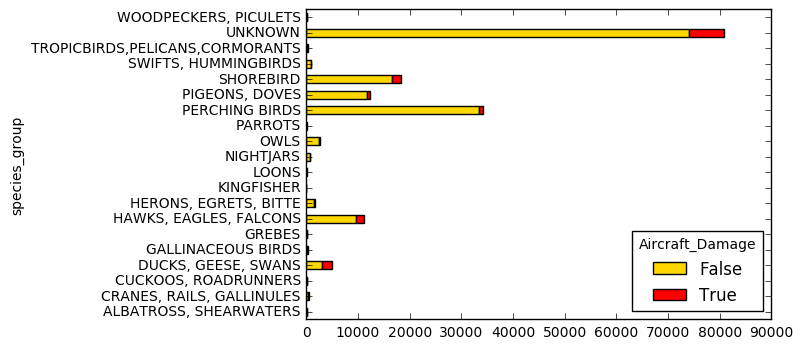

In [63]:
# VERTICAL BAR CHART INCLUDING PCT DAMAGE AND TOTAL INCIDENTS PER SPECIES GROUP
damage_counts = pd.crosstab(df['species_group'],df['Aircraft_Damage'].astype(bool))

damage_counts.plot(kind='barh',
                   stacked=True,
                   color=['gold','red'])

Incident_Year
1990     2099
1991     2672
1992     2816
1993     2849
1994     2938
1995     2989
1996     3215
1997     3651
1998     4131
1999     5385
2000     6351
2001     6216
2002     6659
2003     6485
2004     7122
2005     7591
2006     7750
2007     7993
2008     7993
2009     9848
2010     9934
2011    10363
2012    11264
2013    11666
2014    13976
2015    10148
Name: Aircraft_Damage, dtype: int64


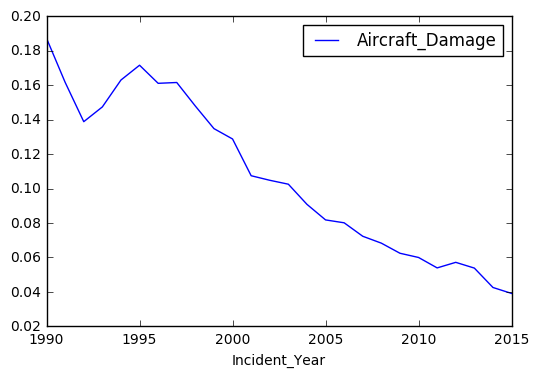

In [51]:
df_grouped = df.groupby(by='Incident_Year')
df_total = df_grouped.Aircraft_Damage.count()
print(df_total)
df_rate = pd.DataFrame(df_grouped.Aircraft_Damage.sum()/df_grouped.Aircraft_Damage.count())
df_rate.plot(kind='line')

# Damage Rate Over 

<function matplotlib.pyplot.show>

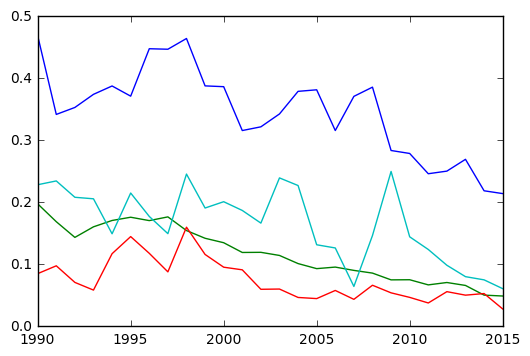

In [42]:
#Damage rate over time
df_group_year = df.groupby(by=['Incident_Year','Engines'], as_index=False)['Aircraft_Damage'].mean()

a1 = df_group_year.where(df_group_year['Engines']==1.0)
a2 = df_group_year.where(df_group_year['Engines']==2.0)
a3 = df_group_year.where(df_group_year['Engines']==3.0)
a4 = df_group_year.where(df_group_year['Engines']==4.0)
a1 = a1.dropna()
a2 = a2.dropna()
a3 = a3.dropna()
a4 = a4.dropna()

plt.plot(a1['Incident_Year'],a1['Aircraft_Damage'])
plt.plot(a2['Incident_Year'],a2['Aircraft_Damage'])
plt.plot(a3['Incident_Year'],a3['Aircraft_Damage'])
plt.plot(a4['Incident_Year'],a4['Aircraft_Damage'])
plt.show

#incident_rate = df_group_year.Aircraft_Damage.sum() / df_group_year.Aircraft_Damage.count()

#crossed = pd.crosstab([df['Incident_Year'],df['Engines']],df.Aircraft_Damage.astype(bool))
#incident_rate = crossed.div(crossed.sum(1).astype(float) axis=0) # normalize the value

#print(incident_rate)

#plt.figure(); incident_rate.plot(x='Incident_Year',y='Aircraft_Damage');
#print(incident_rate)
#ax = incident_rate.plot(kind='line')


In [43]:
df_grouped = df.groupby(by=['Engines'])
print (df_grouped.Aircraft_Damage.count())
print (df_grouped.Aircraft_Damage.sum())
print (df_grouped.Aircraft_Damage.sum() / df_grouped.Aircraft_Damage.count())

Engines
1.0      7471
2.0    108155
3.0      8619
4.0      3097
Name: Aircraft_Damage, dtype: int64
Engines
1.0     2438
2.0    10702
3.0      655
4.0      497
Name: Aircraft_Damage, dtype: int64
Engines
1.0    0.326328
2.0    0.098951
3.0    0.075995
4.0    0.160478
Name: Aircraft_Damage, dtype: float64


## Plots

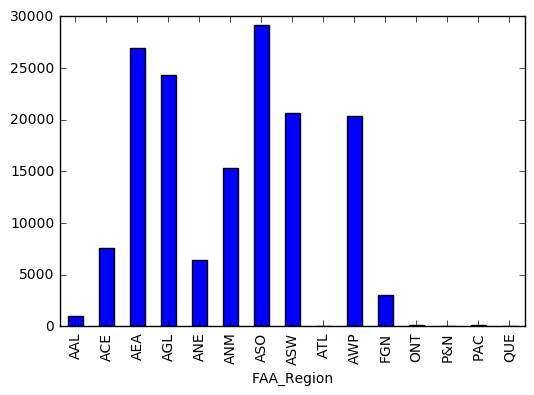

In [44]:
df_region = df.groupby(by='FAA_Region')
df_region_count = df_region.Aircraft_Damage.count()

ax = df_region_count.plot(kind='bar')

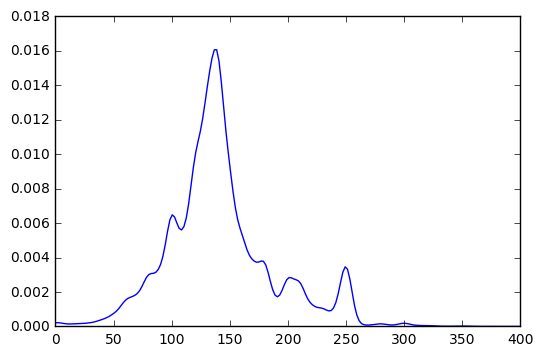

In [45]:
from scipy.stats import gaussian_kde
df_speed = df['Speed']
df_speed = df_speed.dropna()
density = gaussian_kde(df_speed)
xs = np.linspace(0,400,200)
#density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

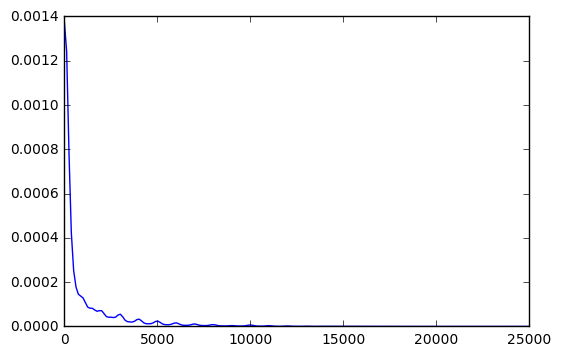

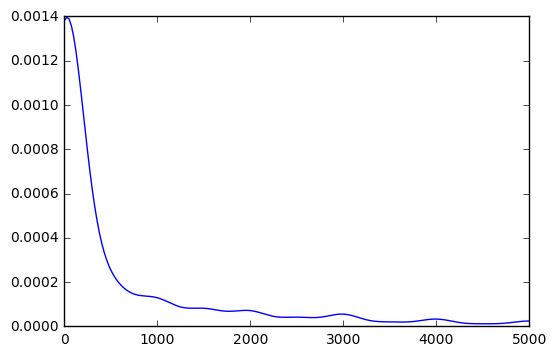

In [46]:
df_height = df['Height']
df_height = df_height.dropna()
density = gaussian_kde(df_height)
xs = np.linspace(0,25000,200)
#density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

xs = np.linspace(0,5000,200)
#density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

Aircraft_Damage     False     True 
Flight_Phase                       
APPROACH         0.903925  0.096075
ARRIVAL          0.948052  0.051948
CLIMB            0.837650  0.162350
DEPARTURE        0.964770  0.035230
DESCENT          0.798677  0.201323
EN ROUTE         0.613583  0.386417
LANDING          0.952077  0.047923
LANDING ROLL     0.926693  0.073307
LOCAL            0.943038  0.056962
PARKED           0.926316  0.073684
TAKEOFF RUN      0.908122  0.091878
TAXI             0.921914  0.078086


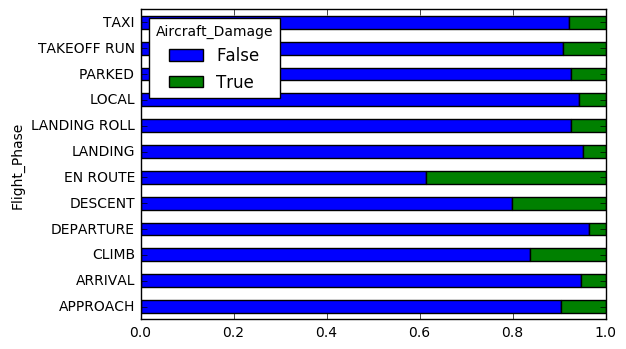

In [47]:
df_phase = pd.crosstab(df['Flight_Phase'],df.Aircraft_Damage.astype(bool))
df_phase_rate = df_phase.div(df_phase.sum(1).astype(float),
                            axis=0)
print(df_phase_rate)
ax = df_phase_rate.plot(kind='barh',stacked=True)

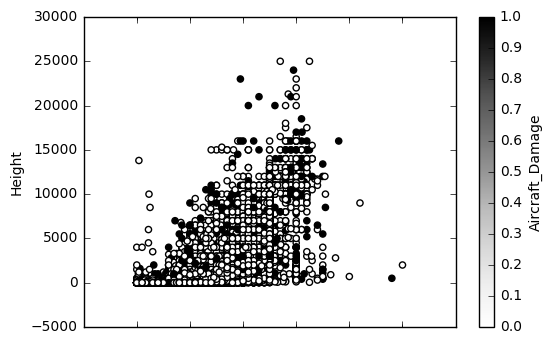

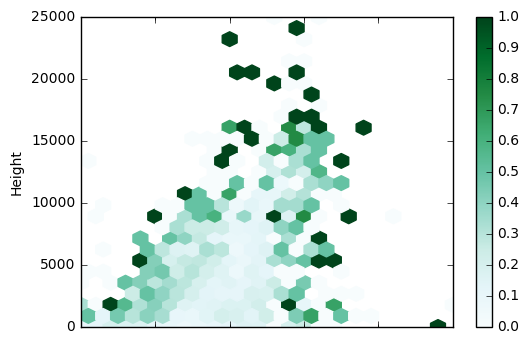

In [48]:
df_speed_height = df[['Speed','Height','Aircraft_Damage']]
df_speed_height = df_speed_height.dropna()
df_speed_height = df_speed_height[df_speed_height['Speed'] < 2000]
#used to drop a bad data point.  The speed indicated in the data was faster than the plan was capable of flying.
#plt.plot(df_speed_height['Speed'],df_speed_height['Height'],"o")
ax = df_speed_height.plot(kind='scatter', x='Speed',y='Height',c='Aircraft_Damage')
df_speed_height.plot(kind='hexbin', x='Speed',y='Height',C='Aircraft_Damage',reduce_C_function=np.mean,gridsize=25)

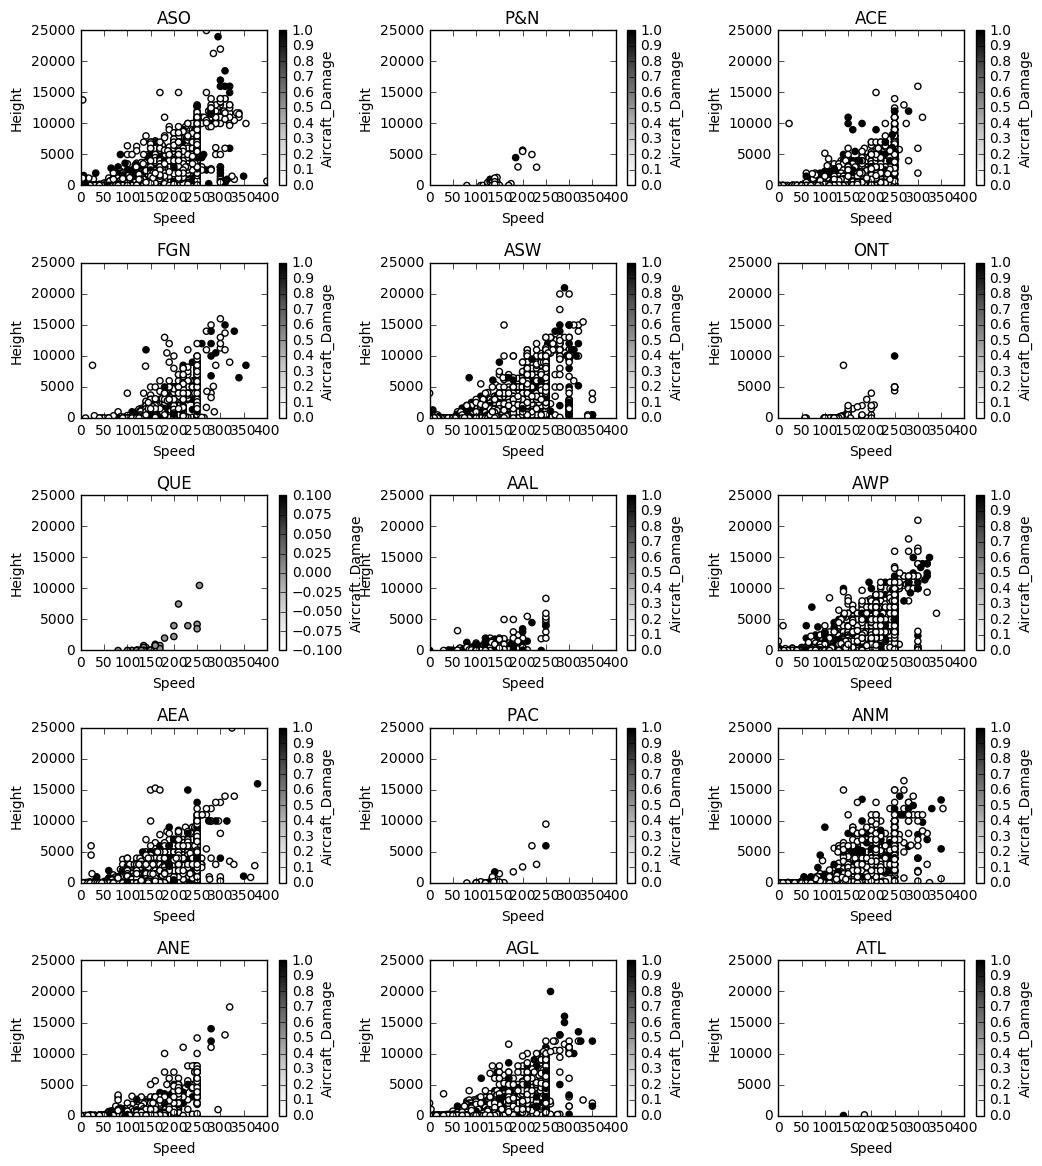

In [49]:
df_speed_height_region = df[['Speed','Height','FAA_Region','Aircraft_Damage']]
df_speed_height_region = df_speed_height_region.dropna()
df_speed_height_region = df_speed_height_region[df_speed_height_region['Speed'] < 2000]
FAA_Region = pd.unique(df_speed_height_region['FAA_Region'])

plt.subplots_adjust(wspace=0.5, hspace=0.5)

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12,14))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for index, plot_vars in enumerate(FAA_Region):
    a = index % 3
    b = index % 5
    figregion = df_speed_height_region[df_speed_height_region['FAA_Region'] == FAA_Region[index]]
    ax = figregion.plot(ax=axes[b,a],kind='scatter', x='Speed',y ='Height',c='Aircraft_Damage',xlim=(0,400),ylim=(0,25000), title=FAA_Region[index])
plt.show()
    